# SNPs + vertical transmission: Efast sensitivity analysis

In [1]:
from SALib.sample import saltelli, fast_sampler
import pandas as pd
from Sensitivity import Sensitivity
import joblib
model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"

In [13]:
# parameter dictionary
problem = {
    'num_vars': 4,
    'names': ['random-mating', 'genetic-variance', 'vertical-trans-variance', 'fertility-differential'],
    'bounds': [[0, 1.0],
               [0, 0.20],
               [0, 0.20],
               [0, 0.30]]
}

In [16]:
sample_parameters = True
if (sample_parameters):
    param_values = fast_sampler.sample(problem, 2000)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'vertical-trans-variance', 'fertility-differential']
    t.to_csv(model_path + "data/param-snp-vt-efast-test.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-vt-efast-test.csv")
t.shape

(8000, 4)

In [11]:
t.head()

,random-mating,genetic-variance,vertical-trans-variance,fertility-differential
0,0.37043,0.074086,0.074086,0.111129
1,0.61943,0.074286,0.077286,0.120429
2,0.86843,0.074486,0.080486,0.129729
3,0.88257,0.074686,0.083686,0.139029
4,0.63357,0.074886,0.086886,0.148329


In [5]:
# read data
df = pd.read_csv(output_path + "results-snp-vt-efast-test.csv", sep = ";")
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-vt-efast-test.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_vertical_trans_variance', 'p_random_mating', 'p_genetic_variance']
X = df.loc[:,vars]

/var/folders/36/wsfqn0_j2ng6r0b58wc559fc0000gn/T/ipykernel_49428/143308219.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


## Proportion obese

                               S1        ST   S1_conf   ST_conf
random-mating            0.100608  0.159933  0.004028  0.021961
genetic-variance         0.289139  0.381786  0.004103  0.020936
vertical-trans-variance  0.315912  0.410642  0.003334  0.019062
fertility-differential   0.112287  0.162931  0.003739  0.018642


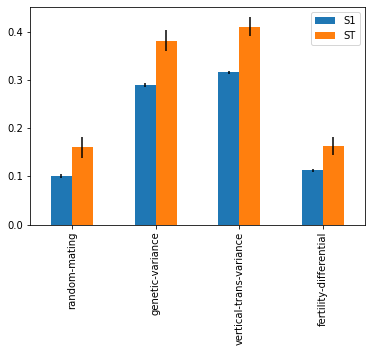

In [6]:
ef = Sensitivity(problem, df['g4'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-vt-efast-prop-obese-test.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav = {
    'ef_obese_s1': ef.tabval('S1'),
    'ef_obese_st': ef.tabval('ST')
}

## Average BMI

                               S1        ST   S1_conf   ST_conf
random-mating            0.057264  0.108174  0.004057  0.018530
genetic-variance         0.258764  0.352409  0.003508  0.019548
vertical-trans-variance  0.408296  0.486032  0.004286  0.018956
fertility-differential   0.108813  0.165760  0.003709  0.019887


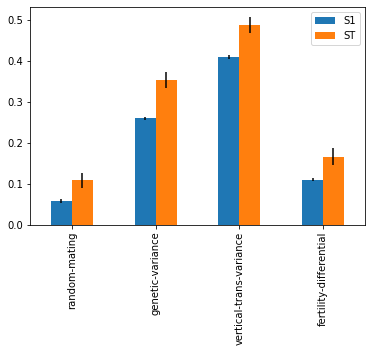

In [7]:
ef = Sensitivity(problem, df['average_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-vt-efast-average-bmi-test.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'average bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['ef_average_s1'] = ef.tabval('S1')
sav['ef_average_st'] = ef.tabval('ST')

## SD BMI

                               S1        ST   S1_conf   ST_conf
random-mating            0.043455  0.318920  0.003645  0.017053
genetic-variance         0.086872  0.320869  0.003486  0.022609
vertical-trans-variance  0.129795  0.364627  0.004139  0.017265
fertility-differential   0.227925  0.651507  0.004296  0.016732


['efast-snp-vt.pkl']

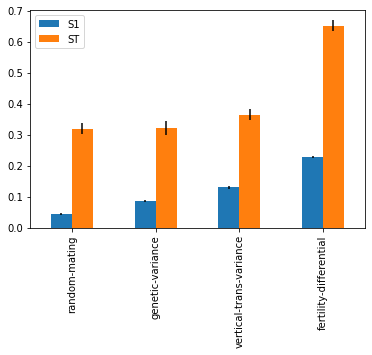

In [8]:
ef = Sensitivity(problem, df['sd_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-vt-efast-sd-bmi-test.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'sd bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['ef_sd_s1'] = ef.tabval('S1')
sav['ef_sd_st'] = ef.tabval('ST')

# save output
v = ef.createRows(sav)
joblib.dump(v, 'efast-snp-vt.pkl')